In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import correlate
from scipy.signal import periodogram


def autocorrelation(x):
    result = correlate(x, x, mode='full')
    result = result[result.size // 2:] / len(x)
    return result

def generate_periodogram(signal):
    fs = 1000
    f, Pxx = periodogram(signal, fs=fs)

    plt.figure()
    plt.semilogy(f, Pxx)
    plt.xlabel("Frequency [Hz]")
    plt.ylabel("Power/Frequency [dB/Hz]")
    plt.grid(True)
    plt.show()
    
def plot(xlabel, ylabel):
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)

def characteristics(signal):
    
    N = len(signal)
    
    mean = np.mean(signal)
    variance = np.var(signal)
    print(f"Global Mean: {mean:.4f}, Global Variance: {variance:.4f}")
    
    plt.figure()
    plt.plot(signal)
    plot("Sample", "Amplitude")

    plt.figure()
    plt.hist(signal, bins=50, density=True, alpha=0.7, color='skyblue', edgecolor='black')
    plot("Amplitude", "Probability Density")

    autocorr = autocorrelation(signal)

    plt.figure()
    plt.plot(autocorr)
    plot("Lag", "Autocorrelation")

    signal_centered = signal - np.mean(signal)
    autocov = autocorrelation(signal_centered)

    plt.figure()
    plt.plot(autocov)
    plot("Lag", "Autocovariance")

    running_mean = np.cumsum(signal) / np.arange(1, N + 1)

    plt.figure()
    plt.plot(running_mean)
    plot("Sample", "Mean Estimate")

    window_size = 200
    step = 100
    means = []
    vars_ = []
    positions = []

    for start in range(0, N - window_size, step):
        window = signal[start:start + window_size]
        means.append(np.mean(window))
        vars_.append(np.var(window))
        positions.append(start + window_size // 2)

    plt.figure()
    plt.subplot(2, 1, 1)
    plt.plot(positions, means, marker='o')
    plot("Sample Position", "Mean")

    plt.subplot(2, 1, 2)
    plt.plot(positions, vars_, marker='s', color='orange')
    plot("Sample Position", "Variance")
    
    plt.show()
    
    generate_periodogram(signal)

/home/lpo/.sage/local/lib/python3.10/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


In [2]:
N = 1000
white_noise = np.random.normal(loc=0.0, scale=1.0, size=N)
uniform_noise = np.random.uniform(low=-1.0, high=1.0, size=N)

Global Mean: -0.0180, Global Variance: 1.0646


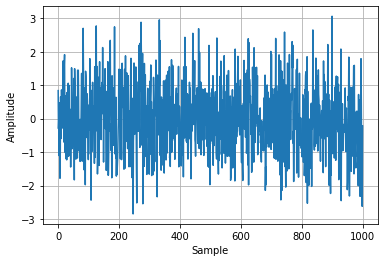

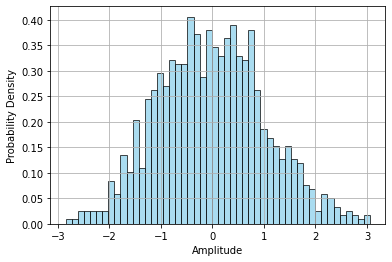

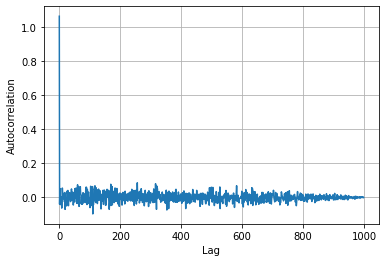

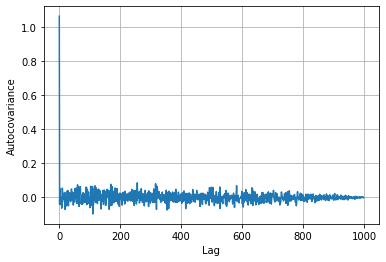

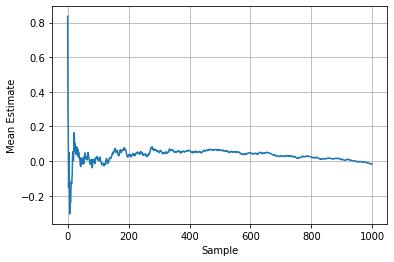

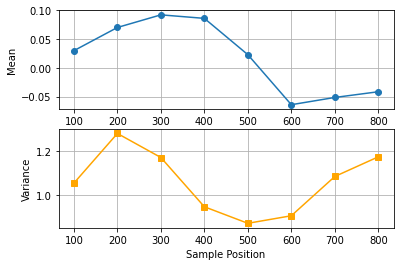

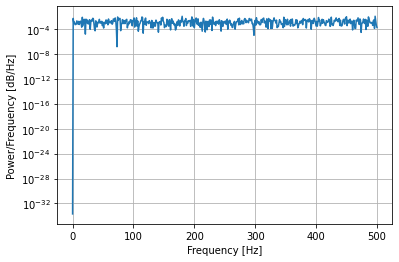

In [3]:
characteristics(white_noise)

Global Mean: -0.0068, Global Variance: 0.3363


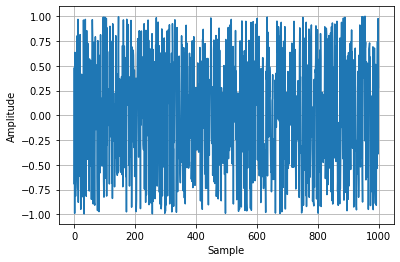

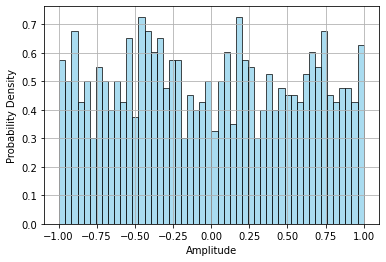

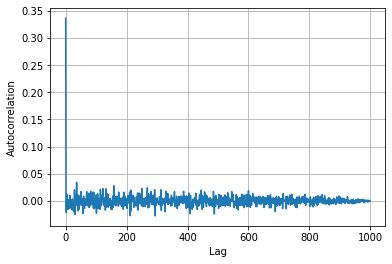

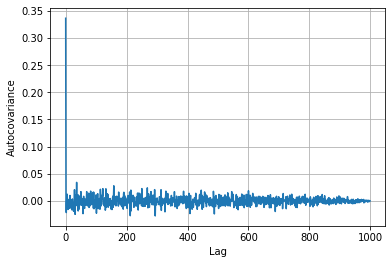

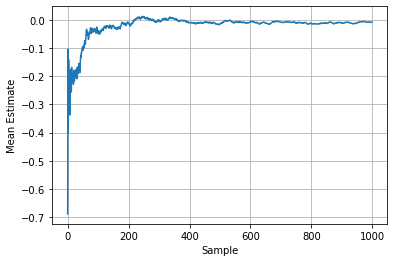

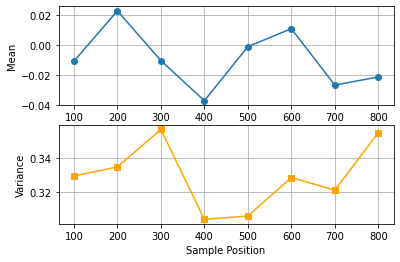

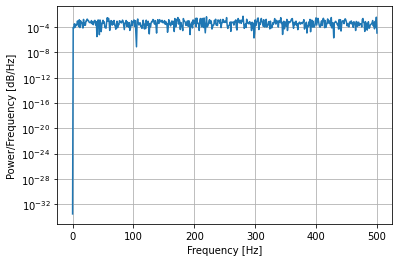

In [4]:
characteristics(uniform_noise)